In [2]:
from fastai.vision.all import *

In [3]:
Path.BASE_PATH = Path.home()/".fastai/data/fer-2013"
path = Path.BASE_PATH

In [4]:
path.ls()

(#2) [Path('test'),Path('train')]

In [5]:
# How images look like
train_images_path = path/"train"
train_images_path.ls()

(#7) [Path('train/disgust'),Path('train/sad'),Path('train/angry'),Path('train/fear'),Path('train/surprise'),Path('train/happy'),Path('train/neutral')]

In [6]:
train_images = path/"train/angry"
train_images.ls()

(#3995) [Path('train/angry/Training_39779201.jpg'),Path('train/angry/Training_54171715.jpg'),Path('train/angry/Training_16084063.jpg'),Path('train/angry/Training_99528050.jpg'),Path('train/angry/Training_86224020.jpg'),Path('train/angry/Training_58559868.jpg'),Path('train/angry/Training_59376220.jpg'),Path('train/angry/Training_39431604.jpg'),Path('train/angry/Training_58632039.jpg'),Path('train/angry/Training_97679052.jpg')...]

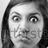

In [6]:
img = Image.open("/home/jupyter-master/.fastai/data/fer-2013/train/disgust/Training_65738066.jpg")
img

In [56]:
img.size

(48, 48)

In [7]:
# How training images look like - TODO
for ic in train_image_cat.iterdir():
    img_path = ic.ls()[0]
    print(img_path)

NameError: name 'train_image_cat' is not defined

In [8]:
doc(RandomSplitter)

In [9]:
facial_expressions = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    batch_tfms=aug_transforms,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)                      

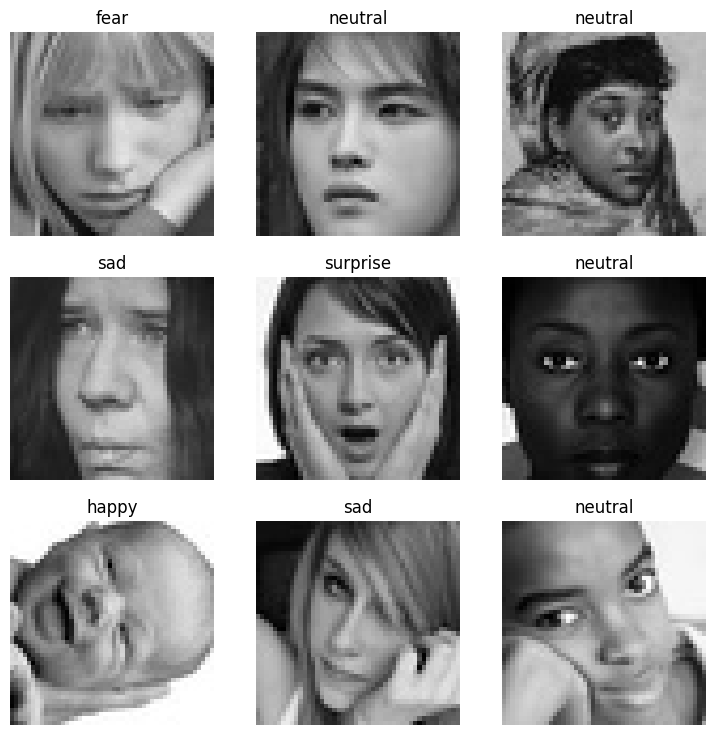

In [10]:
dls = facial_expressions.dataloaders(train_images_path)
dls.train.show_batch()

In [11]:
facial_expressions.summary(train_images_path)

Setting-up type transforms pipelines
Found 28709 items
2 datasets of sizes 22968,5741
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/jupyter-master/.fastai/data/fer-2013/train/happy/Training_36685001.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=48x48
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/jupyter-master/.fastai/data/fer-2013/train/happy/Training_36685001.jpg
    applying parent_label gives
      happy
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(3)

Final sample: (PILImage mode=RGB size=48x48, TensorCategory(3))


Found 28709 items
2 datasets of sizes 22968,5741
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort

In [12]:
dls.vocab

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [13]:
# Create learner

import timm
timm.list_models(filter="efficientnet*", pretrained=True)

['efficientnet_b0.ra_in1k',
 'efficientnet_b1.ft_in1k',
 'efficientnet_b1_pruned.in1k',
 'efficientnet_b2.ra_in1k',
 'efficientnet_b2_pruned.in1k',
 'efficientnet_b3.ra2_in1k',
 'efficientnet_b3_pruned.in1k',
 'efficientnet_b4.ra2_in1k',
 'efficientnet_b5.sw_in12k',
 'efficientnet_b5.sw_in12k_ft_in1k',
 'efficientnet_el.ra_in1k',
 'efficientnet_el_pruned.in1k',
 'efficientnet_em.ra2_in1k',
 'efficientnet_es.ra_in1k',
 'efficientnet_es_pruned.in1k',
 'efficientnet_lite0.ra_in1k',
 'efficientnetv2_rw_m.agc_in1k',
 'efficientnetv2_rw_s.ra2_in1k',
 'efficientnetv2_rw_t.ra2_in1k']

In [14]:
doc(vision_learner)

In [15]:
resnet18?

Signature:
resnet18(
    *,
    weights: Optional[torchvision.models.resnet.ResNet18_Weights] = None,
    progress: bool = True,
    **kwargs: Any,
) -> torchvision.models.resnet.ResNet
Docstring:
ResNet-18 from `Deep Residual Learning for Image Recognition <https://arxiv.org/abs/1512.03385>`__.

Args:
    weights (:class:`~torchvision.models.ResNet18_Weights`, optional): The
        pretrained weights to use. See
        :class:`~torchvision.models.ResNet18_Weights` below for
        more details, and possible values. By default, no pre-trained
        weights are used.
    progress (bool, optional): If True, displays a progress bar of the
        download to stderr. Default is True.
    **kwargs: parameters passed to the ``torchvision.models.resnet.ResNet``
        base class. Please refer to the `source code
        <https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py>`_
        for more details about this class.

.. autoclass:: torchvision.models.ResNet18_Weigh

In [16]:
dls.loss_func

FlattenedLoss of CrossEntropyLoss()

In [14]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

In [15]:
learn.fine_tune(3)

In [19]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

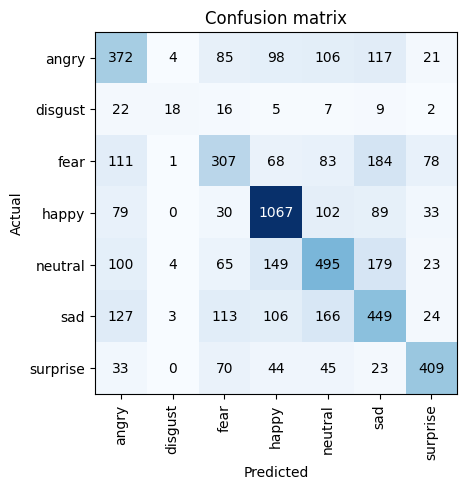

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

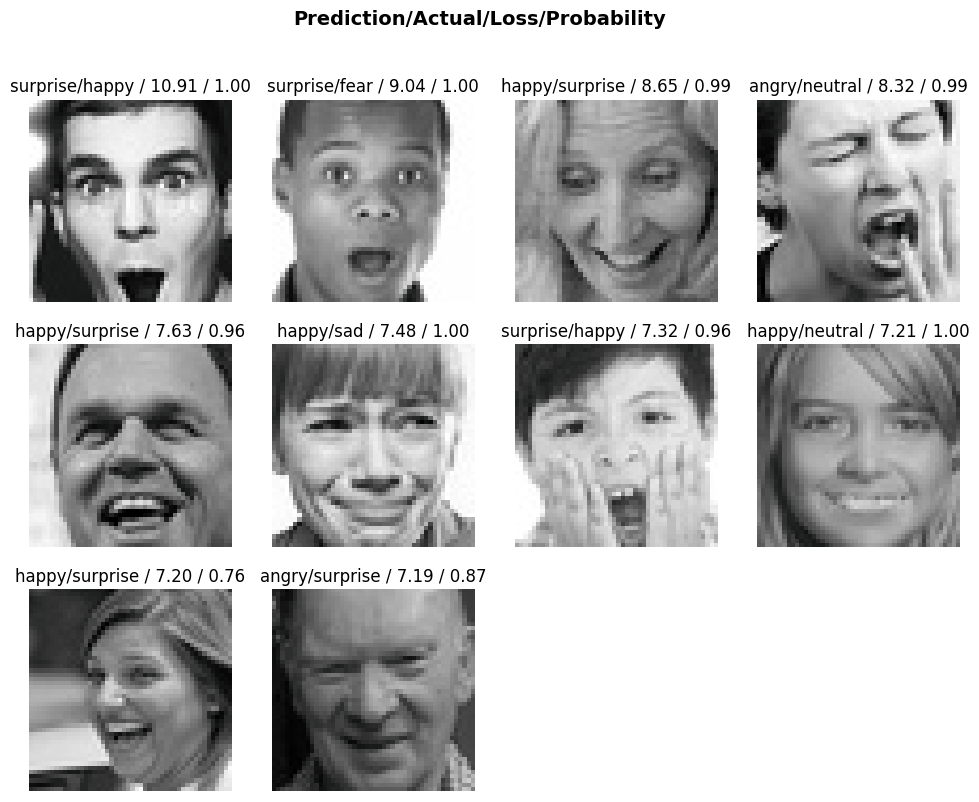

In [21]:
interp.plot_top_losses(10)

In [22]:
# Try a different model - took advice from medium
learn2 = vision_learner(dls, efficientnet_b2, metrics=[error_rate, accuracy])
learn2.fine_tune(6)

/home/jupyter-master/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jupyter-master/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


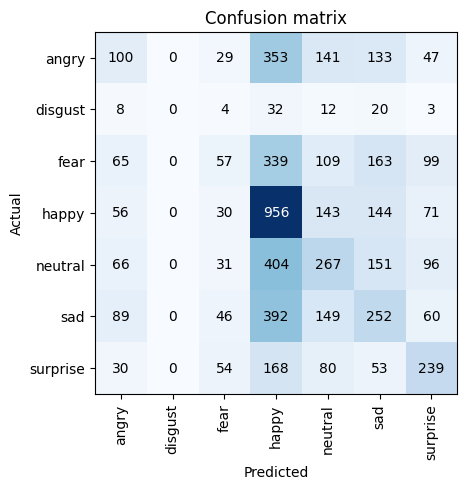

In [23]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

In [24]:
# Bigger does not equal better
learn3 = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])
learn3.fine_tune(3)

In [25]:
# Go big or go home
learn4 = vision_learner(dls, resnet101, metrics=[error_rate, accuracy])
learn4.fine_tune(2)

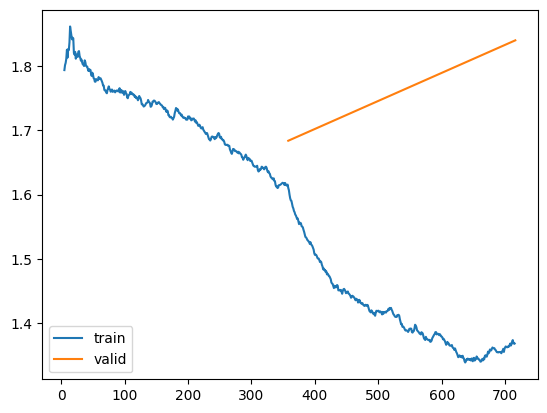

In [26]:
learn4.recorder.plot_loss()

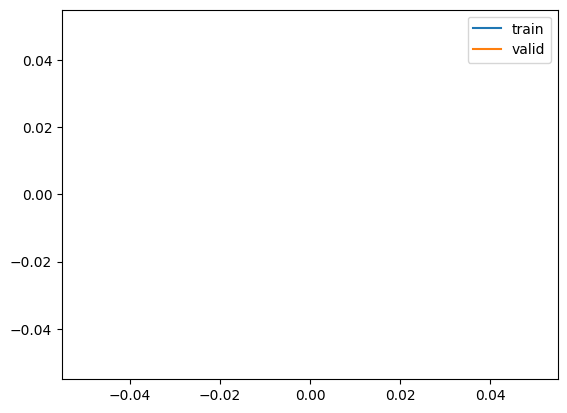

In [27]:
# Overfitting
learn.recorder.plot_loss()

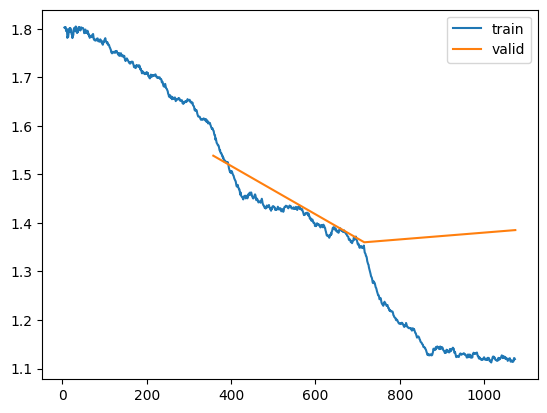

In [28]:
# Overfitting
learn3.recorder.plot_loss()

In [29]:
learn5 = vision_learner(dls, resnet101, metrics=[accuracy, error_rate])
learn5.fine_tune(3)

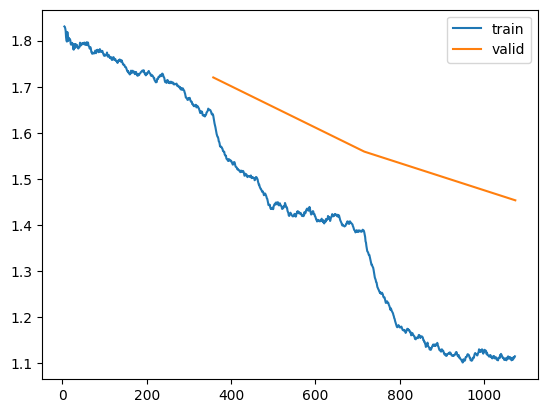

In [30]:
learn5.recorder.plot_loss()

In [31]:
interp5 = ClassificationInterpretation.from_learner(learn5)

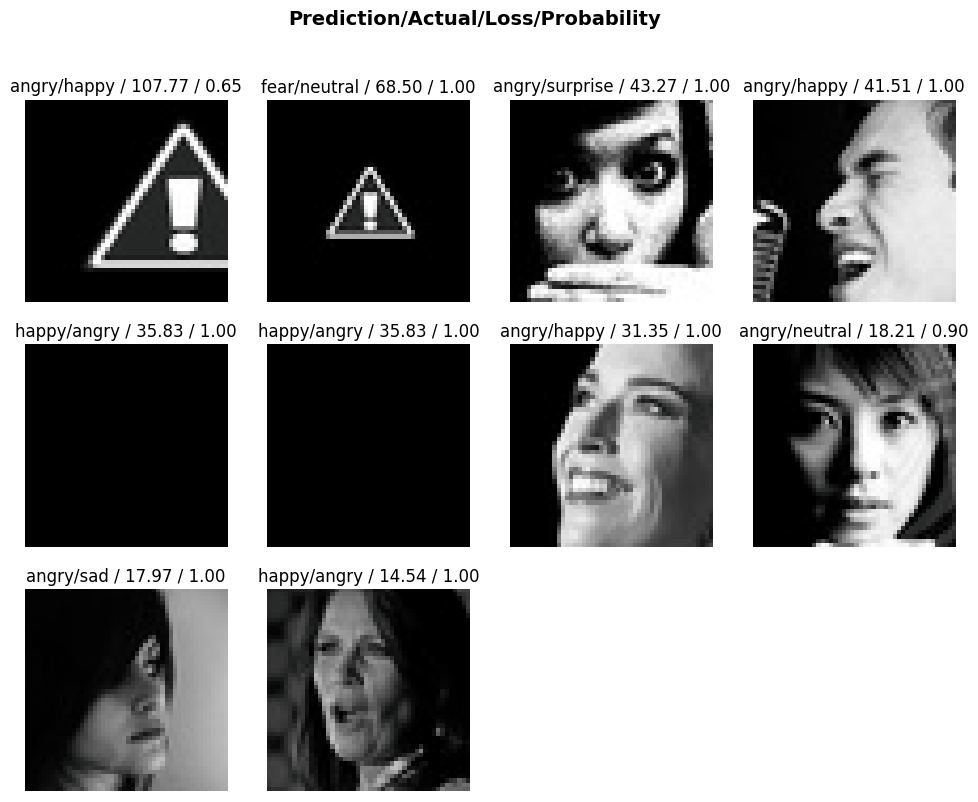

In [32]:
# Whaaat? What are these black images?
interp5.plot_top_losses(10)

## Let's clean the dataset

In [19]:
import fastbook
fastbook.setup_book()
from fastai.vision.widgets import *

In [20]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
# Let's delete the selected images
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

---

# Improve the model - freeze layers

Maybe we can train the first and last layers longer while keeping the middle layers frozen.

In [17]:
learn6 = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn6.fine_tune(3, freeze_epochs=10)

In [22]:
doc(learn6.show_results)

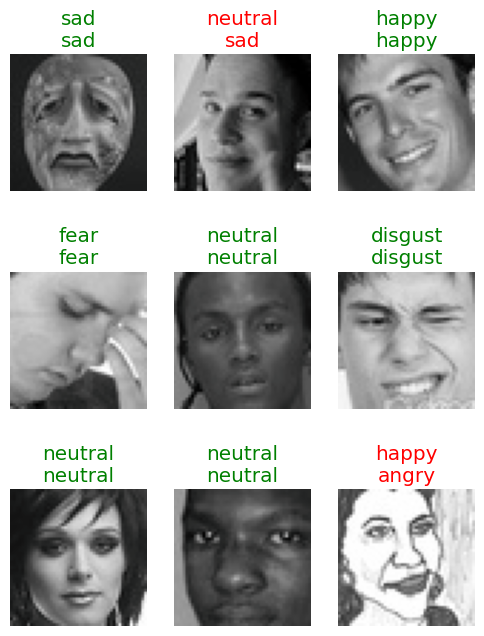

In [28]:
learn.show_results(ds_idx=1, nrows=3, figsize=(6,8))

# Create an app for facial regognition

In [36]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [37]:
def on_click_classify(change):
    img = fastbook.PILImage.create(btn_upload.value[0].content.tobytes())
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(240))
    pred,pred_idx,probs = learn6.predict(img)
    lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"

btn_run.on_click(on_click_classify)

In [38]:
VBox([widgets.Label('Add a face'), 
      btn_upload, btn_run, out_pl, lbl_pred])